In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [79]:
MOCK = True

In [80]:
def shape_one(f):
    f.shape = 1
    return f

def shape_n(f):
    f.shape = RANDOM_SHAPE 
    return f

In [81]:
def get_random_points(type=np.float64):
    buffer = np.random.rand(RANDOM_SHAPE, 1) + np.ones((RANDOM_SHAPE, 1))
    return buffer.astype(type)

def get_random_matrix(type=np.float64):
    buffer = datasets.make_spd_matrix(RANDOM_SHAPE, RANDOM_SHAPE) 
    return buffer.astype(type)

def get_positive_definite_matrix(type=np.float64):
    return get_random_matrix(type=type)

In [82]:
DEFAULT_EPS = 1e-3
RANDOM_SHAPE = 4
RANDOM_POINTS = get_random_points()
RANDOM_MATRIX = get_random_matrix() 
POS_DEF_MATRIX = get_positive_definite_matrix()

RANDOM_POINTS64 = get_random_points(np.float64)
RANDOM_MATRIX64 = get_random_matrix(np.float64)
POS_DEF_MATRIX64 = get_positive_definite_matrix(np.float64)

I = np.identity(RANDOM_SHAPE).astype(np.float64)

In [83]:
def numerical_gradient(f, x, eps=DEFAULT_EPS):
    dtype = x.dtype
    shapes = x.shape[0], f.shape
    n = x.shape[0]
    
    result = []
    
    for t in range(n):
        v_eps = np.reshape(np.zeros(n, dtype=dtype), newshape=x.shape)
        v_eps[t] = eps
        plus, minus = f(x+v_eps), f(x-v_eps)
        result.append((plus - minus) / (2 * eps))
     
    return np.reshape(np.array(result, dtype=dtype), newshape=shapes)

def check_gradient(f, derivative_f, eps=DEFAULT_EPS):
    v_numerical_gradient = numerical_gradient(f, RANDOM_POINTS, eps)
    v_gradient = derivative_f(RANDOM_POINTS)
    # print(v_numerical_gradient)
    # print(v_gradient)
    max_value = np.max(np.abs(v_numerical_gradient - v_gradient))
    check_value = max_value < eps 
    # assert check_value, f"Failed! max error {max_value}"
    if not check_value:
        print(f"Failed! max error {max_value}")
    else:
        print(f'Succes: max error {max_value}')
    

In [84]:
def task_4_1_func(A, x):
    M = np.dot(x, x.transpose()) - A 
    return np.linalg.norm(M) ** 2 / 2 

def task_4_1_gradient(A, x):
    return 2 * (x.dot(x.transpose()) - A).dot(x)

def task_4_1_hessian(A, x):
    return 4 * x.dot(x.transpose()) + 2 * x.transpose().dot(x) * I - 2 * A

In [85]:
def show_plot():
    x = np.linspace(0, 10) 
    y1, y2 = [], [] 
    for i in x:
        v = np.random.rand(4, 1)
        print(task_4_2_gradient(RANDOM_MATRIX, v))
        y1.append(task_4_2_gradient(RANDOM_MATRIX, v)[2, 0])
        y2.append(numerical_gradient(shape_one(lambda x: task_4_2_func(RANDOM_MATRIX, x)), v)[2, 0])
       
    plt.plot(x, y1)
    plt.plot(x, y2)
    plt.legend(['analytic', 'estimate'])
    plt.show()
    
# show_plot()


In [86]:
check_gradient(shape_one(lambda x: task_4_1_func(RANDOM_MATRIX, x)),
               lambda x: task_4_1_gradient(RANDOM_MATRIX, x))

Succes: max error 3.9061910399595945e-06


In [87]:
check_gradient(shape_n(lambda x: task_4_1_gradient(RANDOM_MATRIX, x)),
               lambda x: task_4_1_hessian(RANDOM_MATRIX, x))

Succes: max error 1.999999192037194e-06


In [88]:
def task_4_2_func(A, x):
    return np.dot(x.transpose(), A.dot(x)) / np.linalg.norm(x) ** 2 

def task_4_2_gradient(A, x):
    abs_x = x.transpose().dot(x)
    # return (2 * (x.transpose().dot(A.transpose()) * abs_x - A.dot(x).transpose().dot(x).dot(x.transpose())) / abs_x ** 2).transpose()
    return 2 * (A.dot(x) * abs_x - x.dot(A.dot(x).transpose().dot(x))) / abs_x ** 2

def task_4_2_hessian(A, x):
    return np.zeros(A.shape)

In [89]:
check_gradient(shape_one(lambda x: task_4_2_func(RANDOM_MATRIX, x)),
               lambda x: task_4_2_gradient(RANDOM_MATRIX, x))

Succes: max error 4.973188044710142e-08


In [90]:
check_gradient(shape_n(lambda x: task_4_2_gradient(RANDOM_MATRIX, x)),
               lambda x: task_4_2_hessian(RANDOM_MATRIX, x))

Failed! max error 0.3674537483747409


In [91]:
def task_4_3_func(A, x):
    abs_of_x = x.transpose().dot(x)
    return 2 * abs_of_x ** abs_of_x

def task_4_3_gradient(A, x):
    abs_of_x = x.transpose().dot(x)
    return 2 * x * abs_of_x ** abs_of_x **(1 + np.log(abs_of_x))

def task_4_3_hessian(A, x):
    T = abs_of_x = x.transpose().dot(x)
    return 2 * T ** T * (1 + np.log(T) + 2 * x.dot(x.transpose()) * (T ** -1 + (np.log(T) + 1) ** 2)) + np.ones(A.shape)

In [92]:
check_gradient(shape_one(lambda x: task_4_3_func(RANDOM_MATRIX, x)),
               lambda x: task_4_3_gradient(RANDOM_MATRIX, x))

Failed! max error inf


/home/raf/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys


In [93]:
check_gradient(shape_n(lambda x: task_4_3_gradient(RANDOM_MATRIX, x)),
               lambda x: task_4_3_hessian(RANDOM_MATRIX, x))


Failed! max error nan


/home/raf/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in power
  import sys
/home/raf/anaconda3/envs/common/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


#  Задание 7

In [94]:
def get_max_diff(f, derivative, points, eps):
    analytic_derivative = derivative(points)
    num_grad = numerical_gradient(f, points, eps)
    return np.max(np.abs(analytic_derivative - num_grad))

In [104]:
def plot_eps_relation(points, f, derivative, test_type):
    dtype = points.dtype
    dtype_min = np.finfo(dtype).eps
    dtype_min_sqrt = np.sqrt(dtype_min)
    
    x_eps = [dtype_min * (10 ** 0.5) ** i for i in range(test_type)]
    diffs = list(get_max_diff(f, derivative, points, eps) for eps in x_eps)
                
    plt.title(f'Precision {dtype}')
    plt.plot(x_eps, diffs, 'o', markersize=2)
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel("delta h")
    plt.ylabel("error")
    plt.axvline(dtype_min, linewidth=1, color='r')
    plt.axvline(dtype_min_sqrt, linewidth=1, color='r')
    plt.show()


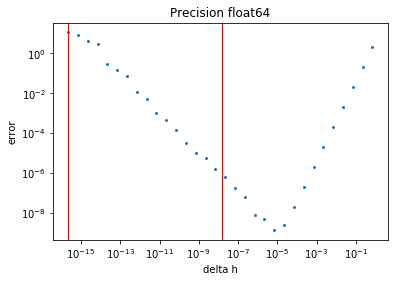

In [105]:
plot_eps_relation(RANDOM_POINTS, 
                  shape_one(lambda x: task_4_1_func(RANDOM_MATRIX, x)),
                  lambda x: task_4_1_gradient(RANDOM_MATRIX, x), 32)

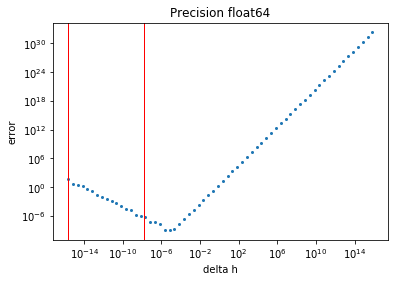

In [106]:
plot_eps_relation(RANDOM_POINTS64, 
                  shape_one(lambda x: task_4_1_func(RANDOM_MATRIX64, x)),
                  lambda x: task_4_1_gradient(RANDOM_MATRIX64, x), 64)

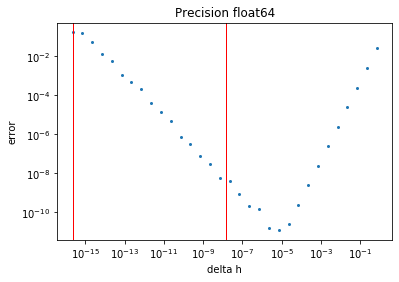

In [107]:
plot_eps_relation(RANDOM_POINTS, 
                  shape_one(lambda x: task_4_2_func(RANDOM_MATRIX, x)), 
                  lambda x: task_4_2_gradient(RANDOM_MATRIX, x), 32)

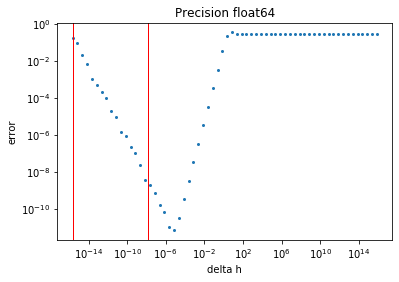

In [108]:
plot_eps_relation(RANDOM_POINTS64, 
                  shape_one(lambda x: task_4_2_func(RANDOM_MATRIX64, x)),
                  lambda x: task_4_2_gradient(RANDOM_MATRIX64, x), 64)

